
# Project: Write a Data Science Blog Post


## Business Understanding
* Question 1: Which are the neighborhood with more Airbnb locations?

* Question 2: What are the features that most affect the price? And those numerical or categorical?

* Question 3: Which areas are more affected by a fluctuation in price/availability over the months?


## Data Understanding
    Access and Explore the data.


Import the libraries and load the data

In [133]:
# import libraries
import pandas as pd
import numpy as np


In [134]:
# load the csv file
calendar = pd.read_csv('./calendar.csv')
original_listing = pd.read_csv('./listings.csv')
listing=original_listing.copy()
reviews = pd.read_csv('./reviews.csv')

Exploring the data

In [135]:
calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [136]:
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1393570 non-null  int64 
 1   date        1393570 non-null  object
 2   available   1393570 non-null  object
 3   price       934542 non-null   object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB


In [137]:
listing.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [138]:
listing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   object 
 12  thumbn

In [139]:
listing.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [140]:
reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


# Prepare Data

## Data cleaning:
Main Problems:
* prices are "object" pandas type (str or mixed) -> we want float
* dates are "object" pandas type (str or mixed) -> we want Date
* zipcode are "object" pandas type (str or mixed) -> we want int
* handling null (NaN) values
* boolean values t/f -> we want 1/0

Cleaning calendar dataframe:

In [141]:
def format_prices(dataframe,columns):
    for colum in columns:
        dataframe[colum] = dataframe[colum].replace({'\$':''}, regex=True)
        dataframe[colum] = dataframe[colum].replace({',':''}, regex=True)
        dataframe[colum]= dataframe[colum].astype(float)
    return dataframe

In [142]:
# remove the dollar sign and the comma
calendar = format_prices(calendar,['price'])

# convert t / f to 1 and 0
calendar["available"] = calendar["available"].replace({'t': 1, 'f': 0})

# convert to datetime
calendar['date'] = pd.to_datetime(calendar['date'])
#check types after that
calendar.dtypes

listing_id             int64
date          datetime64[ns]
available              int64
price                float64
dtype: object

In [143]:
calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,1,85.0
1,241032,2016-01-05,1,85.0
2,241032,2016-01-06,0,NaN
3,241032,2016-01-07,0,NaN
4,241032,2016-01-08,0,NaN


Cleaning listing dataframe:

In [144]:
# we select the columns we want to keep. (we discarded some of them like "square feet" due to the lack of information
columns_list_keep=['id','host_id', 'neighbourhood_cleansed','neighbourhood_group_cleansed', 'city', 'latitude', 'longitude', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities',
       'price', 'cleaning_fee', 'guests_included', 'minimum_nights',
       'maximum_nights', 'number_of_reviews', 'review_scores_rating', 'cancellation_policy',
       'reviews_per_month']

listing=listing[columns_list_keep]

# few have nan as bathrooms and bedrooms. I'll set the default value to 0. Could be a studio apartment or a room in a house without the private bathroom
listing['bathrooms'] = listing['bathrooms'].fillna(0)
listing['bedrooms'] = listing['bedrooms'].fillna(0)
# there are few nan property type. We can set a default value "Other" not to lose them.
listing['property_type'] = listing['property_type'].fillna("Other")

# set the default cleaning_fee to 0
listing['cleaning_fee'] = listing['cleaning_fee'].fillna("$0")
# remove the locations without reviews
listing =listing[~listing['review_scores_rating'].isna()]
# remove the dollar sign and the comma
listing = format_prices(listing, ['price', 'cleaning_fee'])

listing.head()

,id,host_id,neighbourhood_cleansed,neighbourhood_group_cleansed,city,latitude,longitude,property_type,room_type,accommodates,...,amenities,price,cleaning_fee,guests_included,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating,cancellation_policy,reviews_per_month
0,241032,956883,West Queen Anne,Queen Anne,Seattle,47.636289,-122.371025,Apartment,Entire home/apt,4,...,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",85.0,0.0,2,1,365,207,95.0,moderate,4.07
1,953595,5177328,West Queen Anne,Queen Anne,Seattle,47.639123,-122.365666,Apartment,Entire home/apt,4,...,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",150.0,40.0,1,2,90,43,96.0,strict,1.48
2,3308979,16708587,West Queen Anne,Queen Anne,Seattle,47.629724,-122.369483,House,Entire home/apt,11,...,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",975.0,300.0,10,4,30,20,97.0,strict,1.15
4,278830,1452570,West Queen Anne,Queen Anne,Seattle,47.632918,-122.372471,House,Entire home/apt,6,...,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",450.0,125.0,6,1,1125,38,92.0,strict,0.89
5,5956968,326758,West Queen Anne,Queen Anne,Seattle,47.630525,-122.366174,House,Private room,2,...,"{""Wireless Internet"",""Free Parking on Premises...",120.0,40.0,1,1,6,17,95.0,strict,2.45


In [145]:
listing.dtypes

id                                int64
host_id                           int64
neighbourhood_cleansed           object
neighbourhood_group_cleansed     object
city                             object
latitude                        float64
longitude                       float64
property_type                    object
room_type                        object
accommodates                      int64
bathrooms                       float64
bedrooms                        float64
beds                            float64
bed_type                         object
amenities                        object
price                           float64
cleaning_fee                    float64
guests_included                   int64
minimum_nights                    int64
maximum_nights                    int64
number_of_reviews                 int64
review_scores_rating            float64
cancellation_policy              object
reviews_per_month               float64
dtype: object

# DATA VISUALIZATION and EVALUATION

In [146]:
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import colorcet as cc
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

## QUESTION 1
Check the distribution of the Airbnb location grouping by neighborhood

In [147]:
total_apt = len(listing)
# I don't want to use the default "Other neighborhoods" but I'll take the name of the neighborhoods instead of the group name
listing['neighbourhood_group_cleansed'] = np.where(listing['neighbourhood_group_cleansed']=="Other neighborhoods",listing['neighbourhood_cleansed'],listing['neighbourhood_group_cleansed'])

In [148]:
def plot_graphs_location_distribution(listing,name="0"):
    neighbourhood_count = listing['neighbourhood_group_cleansed'].value_counts()
    neighbourhood_count = neighbourhood_count.to_frame().reset_index()
    neighbourhood_count = neighbourhood_count.rename({'index':'neighbourhood_group_cleansed', 'neighbourhood_group_cleansed':'count'}, axis=1)


    color_labels = list(neighbourhood_count['neighbourhood_group_cleansed'].unique())
    # List of colors in the color palettes
    rgb_values = sns.color_palette(cc.glasbey, len(color_labels))


    # Map continents to the colors
    color_map = dict(zip(color_labels, rgb_values))
    fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(30, 12), dpi=80)
    for neighborhood in color_labels:
        x = listing[listing['neighbourhood_group_cleansed'] == neighborhood]
        axes[0].scatter(x=x['longitude'],y=x['latitude'] , color = color_map[neighborhood], label = neighborhood)
    #ax.scatter(x=listing['longitude'],y=listing['latitude'] , c=listing['neighbourhood_group_cleansed'].map(color_map))
    axes[0].axis('equal')
    axes[0].legend()
    axes[0].set_xlabel('Longitude')
    axes[0].set_ylabel('Latitude')
    axes[0].set_title('Location in Seattle')


    axes[1].bar(neighbourhood_count['neighbourhood_group_cleansed'], neighbourhood_count['count'], color=rgb_values)
    axes[1].set_xlabel('Neighbourhood Group')
    axes[1].set_ylabel('# of Location')
    axes[1].set_title('Distribution Among Neighborhood')

    plt.xticks(rotation=45,ha='right')

    fig.savefig('./seattle_map_{}.png'.format(name))
    return neighbourhood_count.head(4)

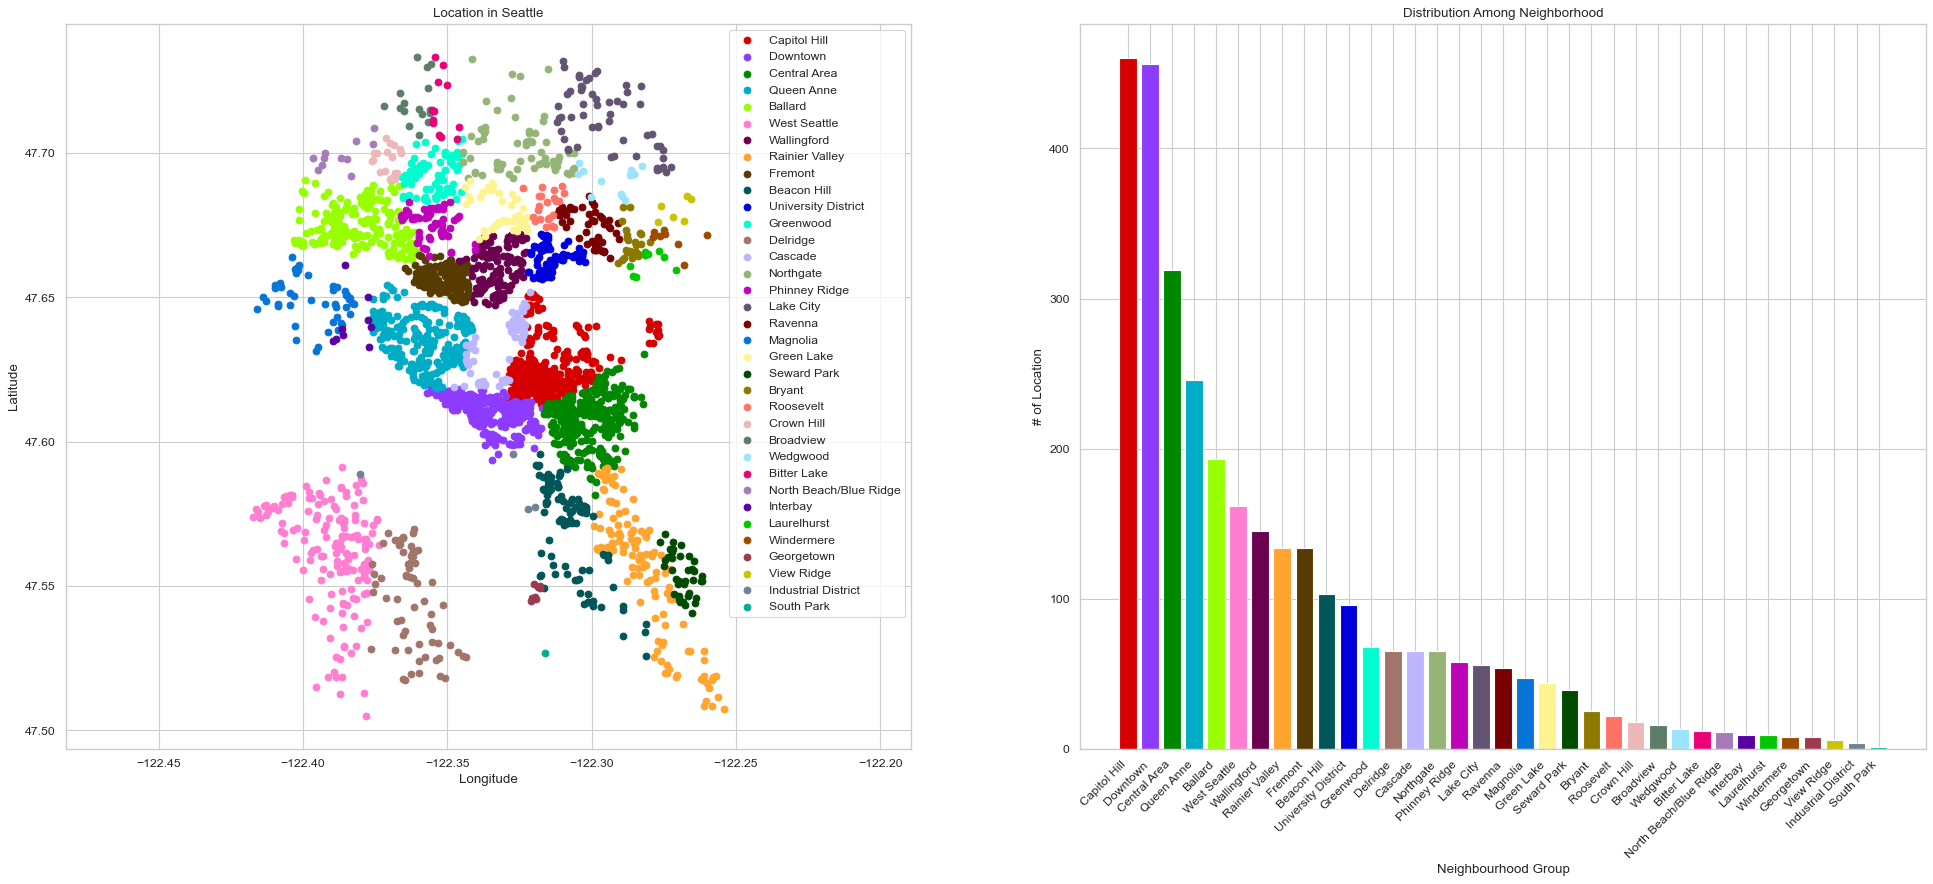

In [149]:
top_4 = plot_graphs_location_distribution(listing, "all")

We can see from the two graphs that the areas with the higher apartment/houses in AirBnB are situate in the center of Seattle and they are:


In [150]:
top_4

,neighbourhood_group_cleansed,count
0,Capitol Hill,460
1,Downtown,456
2,Central Area,319
3,Queen Anne,246


In [151]:
new_listing = listing[listing["neighbourhood_group_cleansed"].isin(["Capitol Hill", "Central Area", "Downtown", "Queen Anne"])]

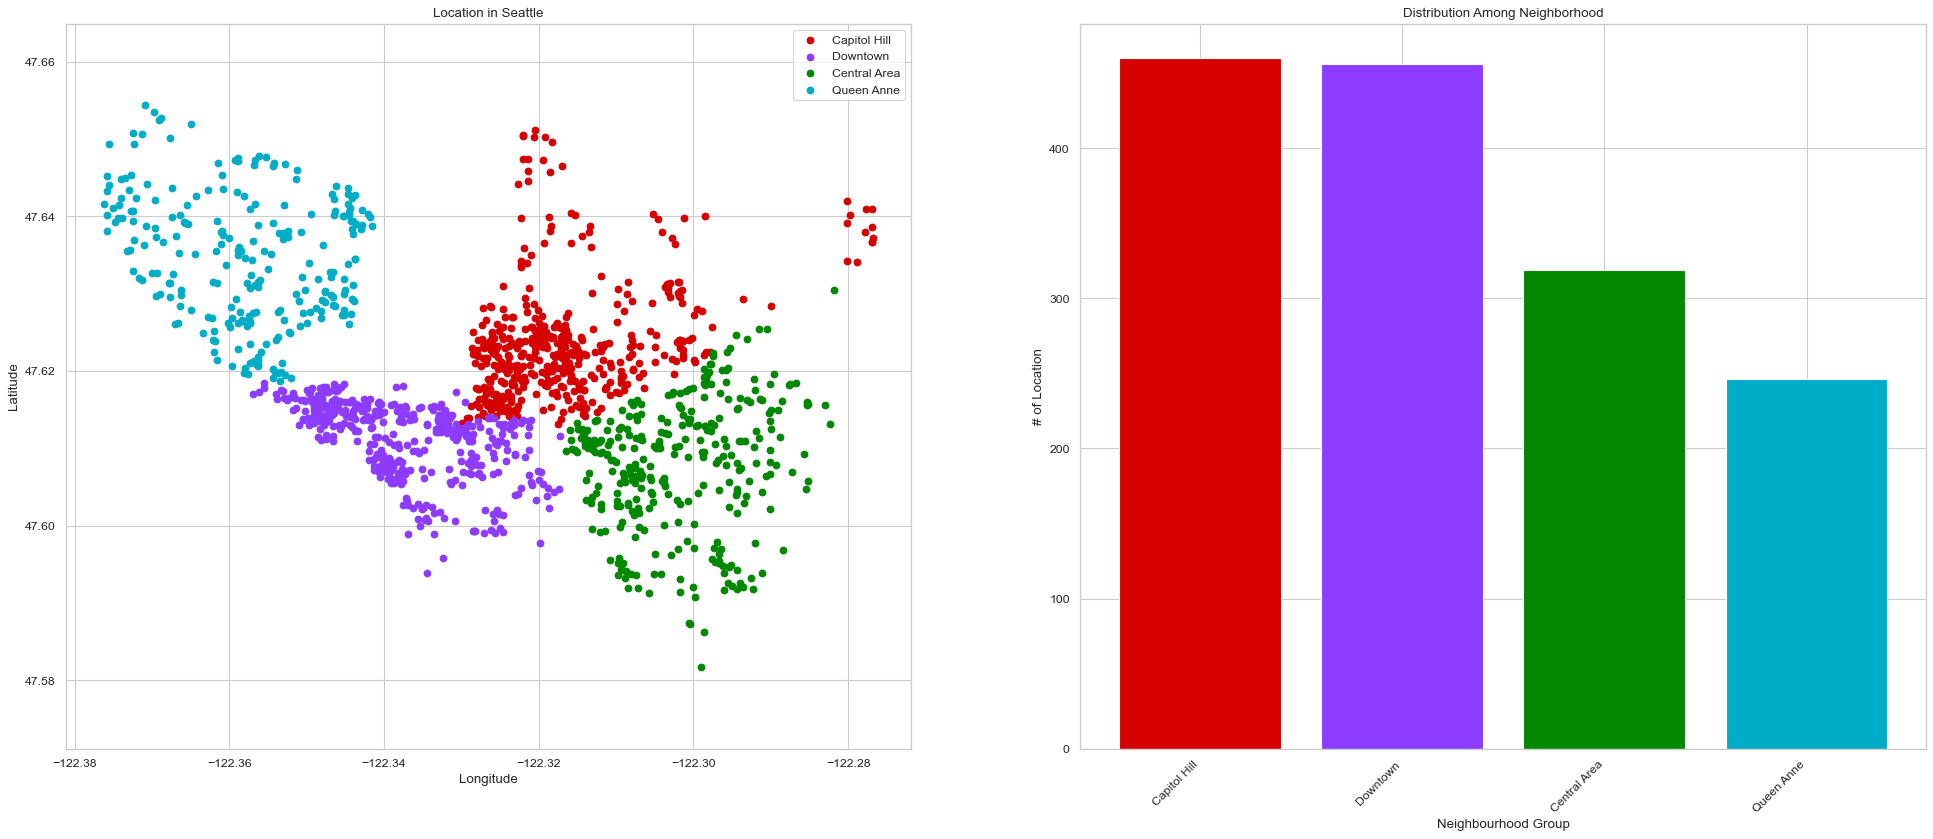

In [152]:
top_4 = plot_graphs_location_distribution(new_listing,"top_4")

## QUESTION 2
Now we want to check if there is a correlation between the features.

In [154]:
def correlation_matrix(df,columns,name="0"):
    for c in columns:
        df[c].fillna(0, inplace=True)
        df[c]=df[c].apply(pd.to_numeric, errors='raise')

    #Find out correlation between columns and plot
    corrs = np.corrcoef(df[columns].values.T)
    sns.set(font_scale=1)
    sns.set(rc={'figure.figsize':(20,20)})
    hm=sns.heatmap(corrs, cbar = True, annot=True, square = True, fmt = '.2f',
                  yticklabels = columns, xticklabels = columns).set_title('Correlations heatmap')

    fig = hm.get_figure()
    fig.savefig('correlations_{}.png'.format(name))
    return corrs

In [153]:
print("We have total of {} AirBnb locations in the dataset".format(total_apt))
print("The top 4 locations are: {}".format(", ".join(list(top_4["neighbourhood_group_cleansed"].unique()))))
print("Top 4 areas coverage : {:.2f}%".format(100*top_4.sum().values[1]/total_apt))

We have total of 3171 AirBnb locations in the dataset
The top 4 locations are: Capitol Hill, Downtown, Central Area, Queen Anne
Top 4 areas coverage : 46.70%


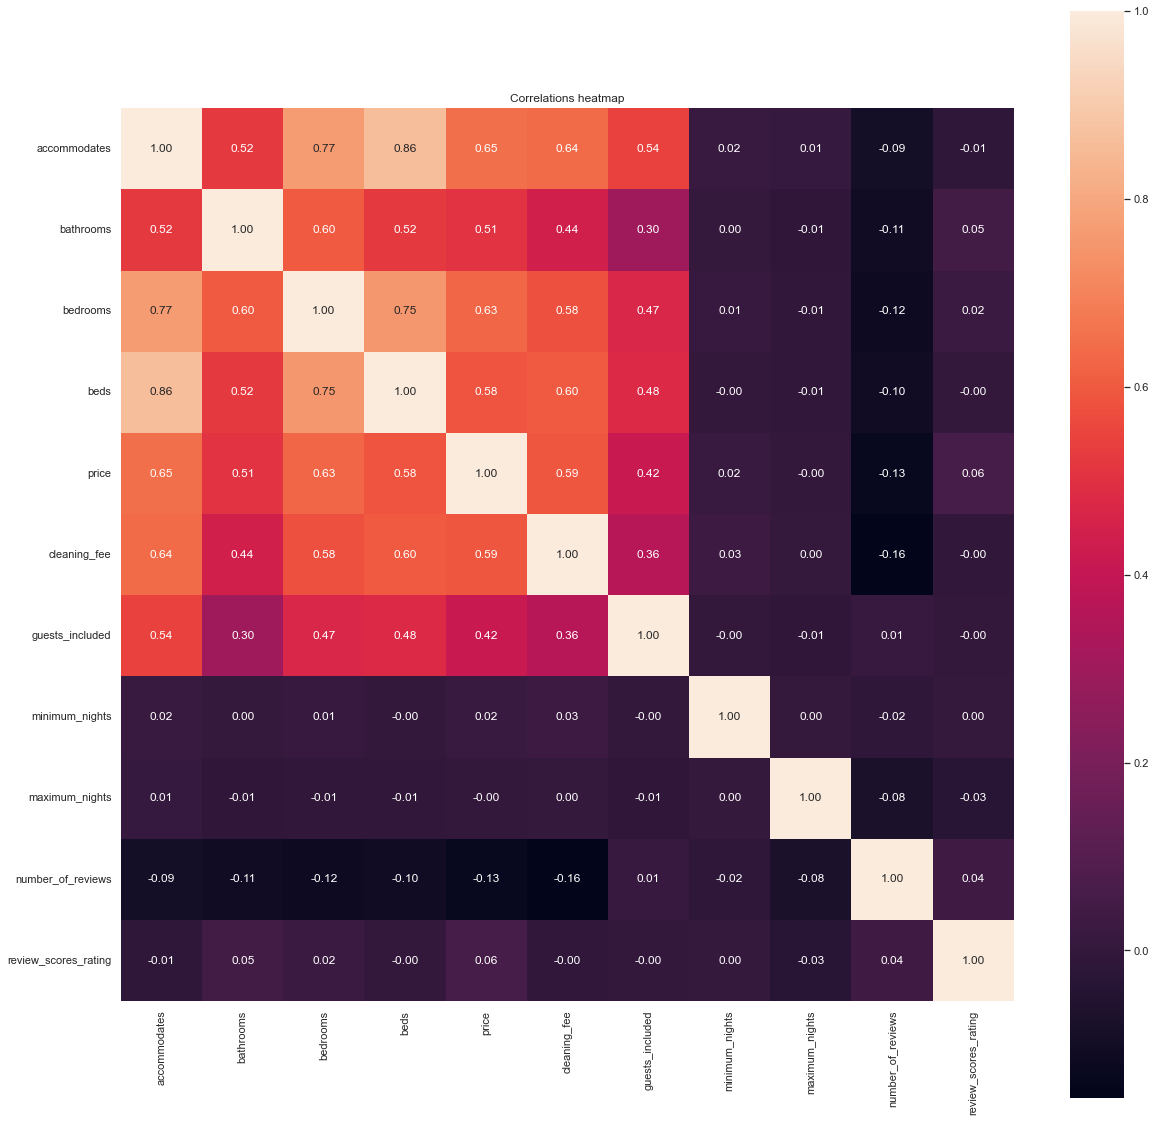

In [155]:
col_corr=["accommodates", "bathrooms", "bedrooms", "beds", "price", "cleaning_fee", "guests_included", "minimum_nights", "maximum_nights", "number_of_reviews", "review_scores_rating"]
corr_matx=correlation_matrix(listing,col_corr,"base")

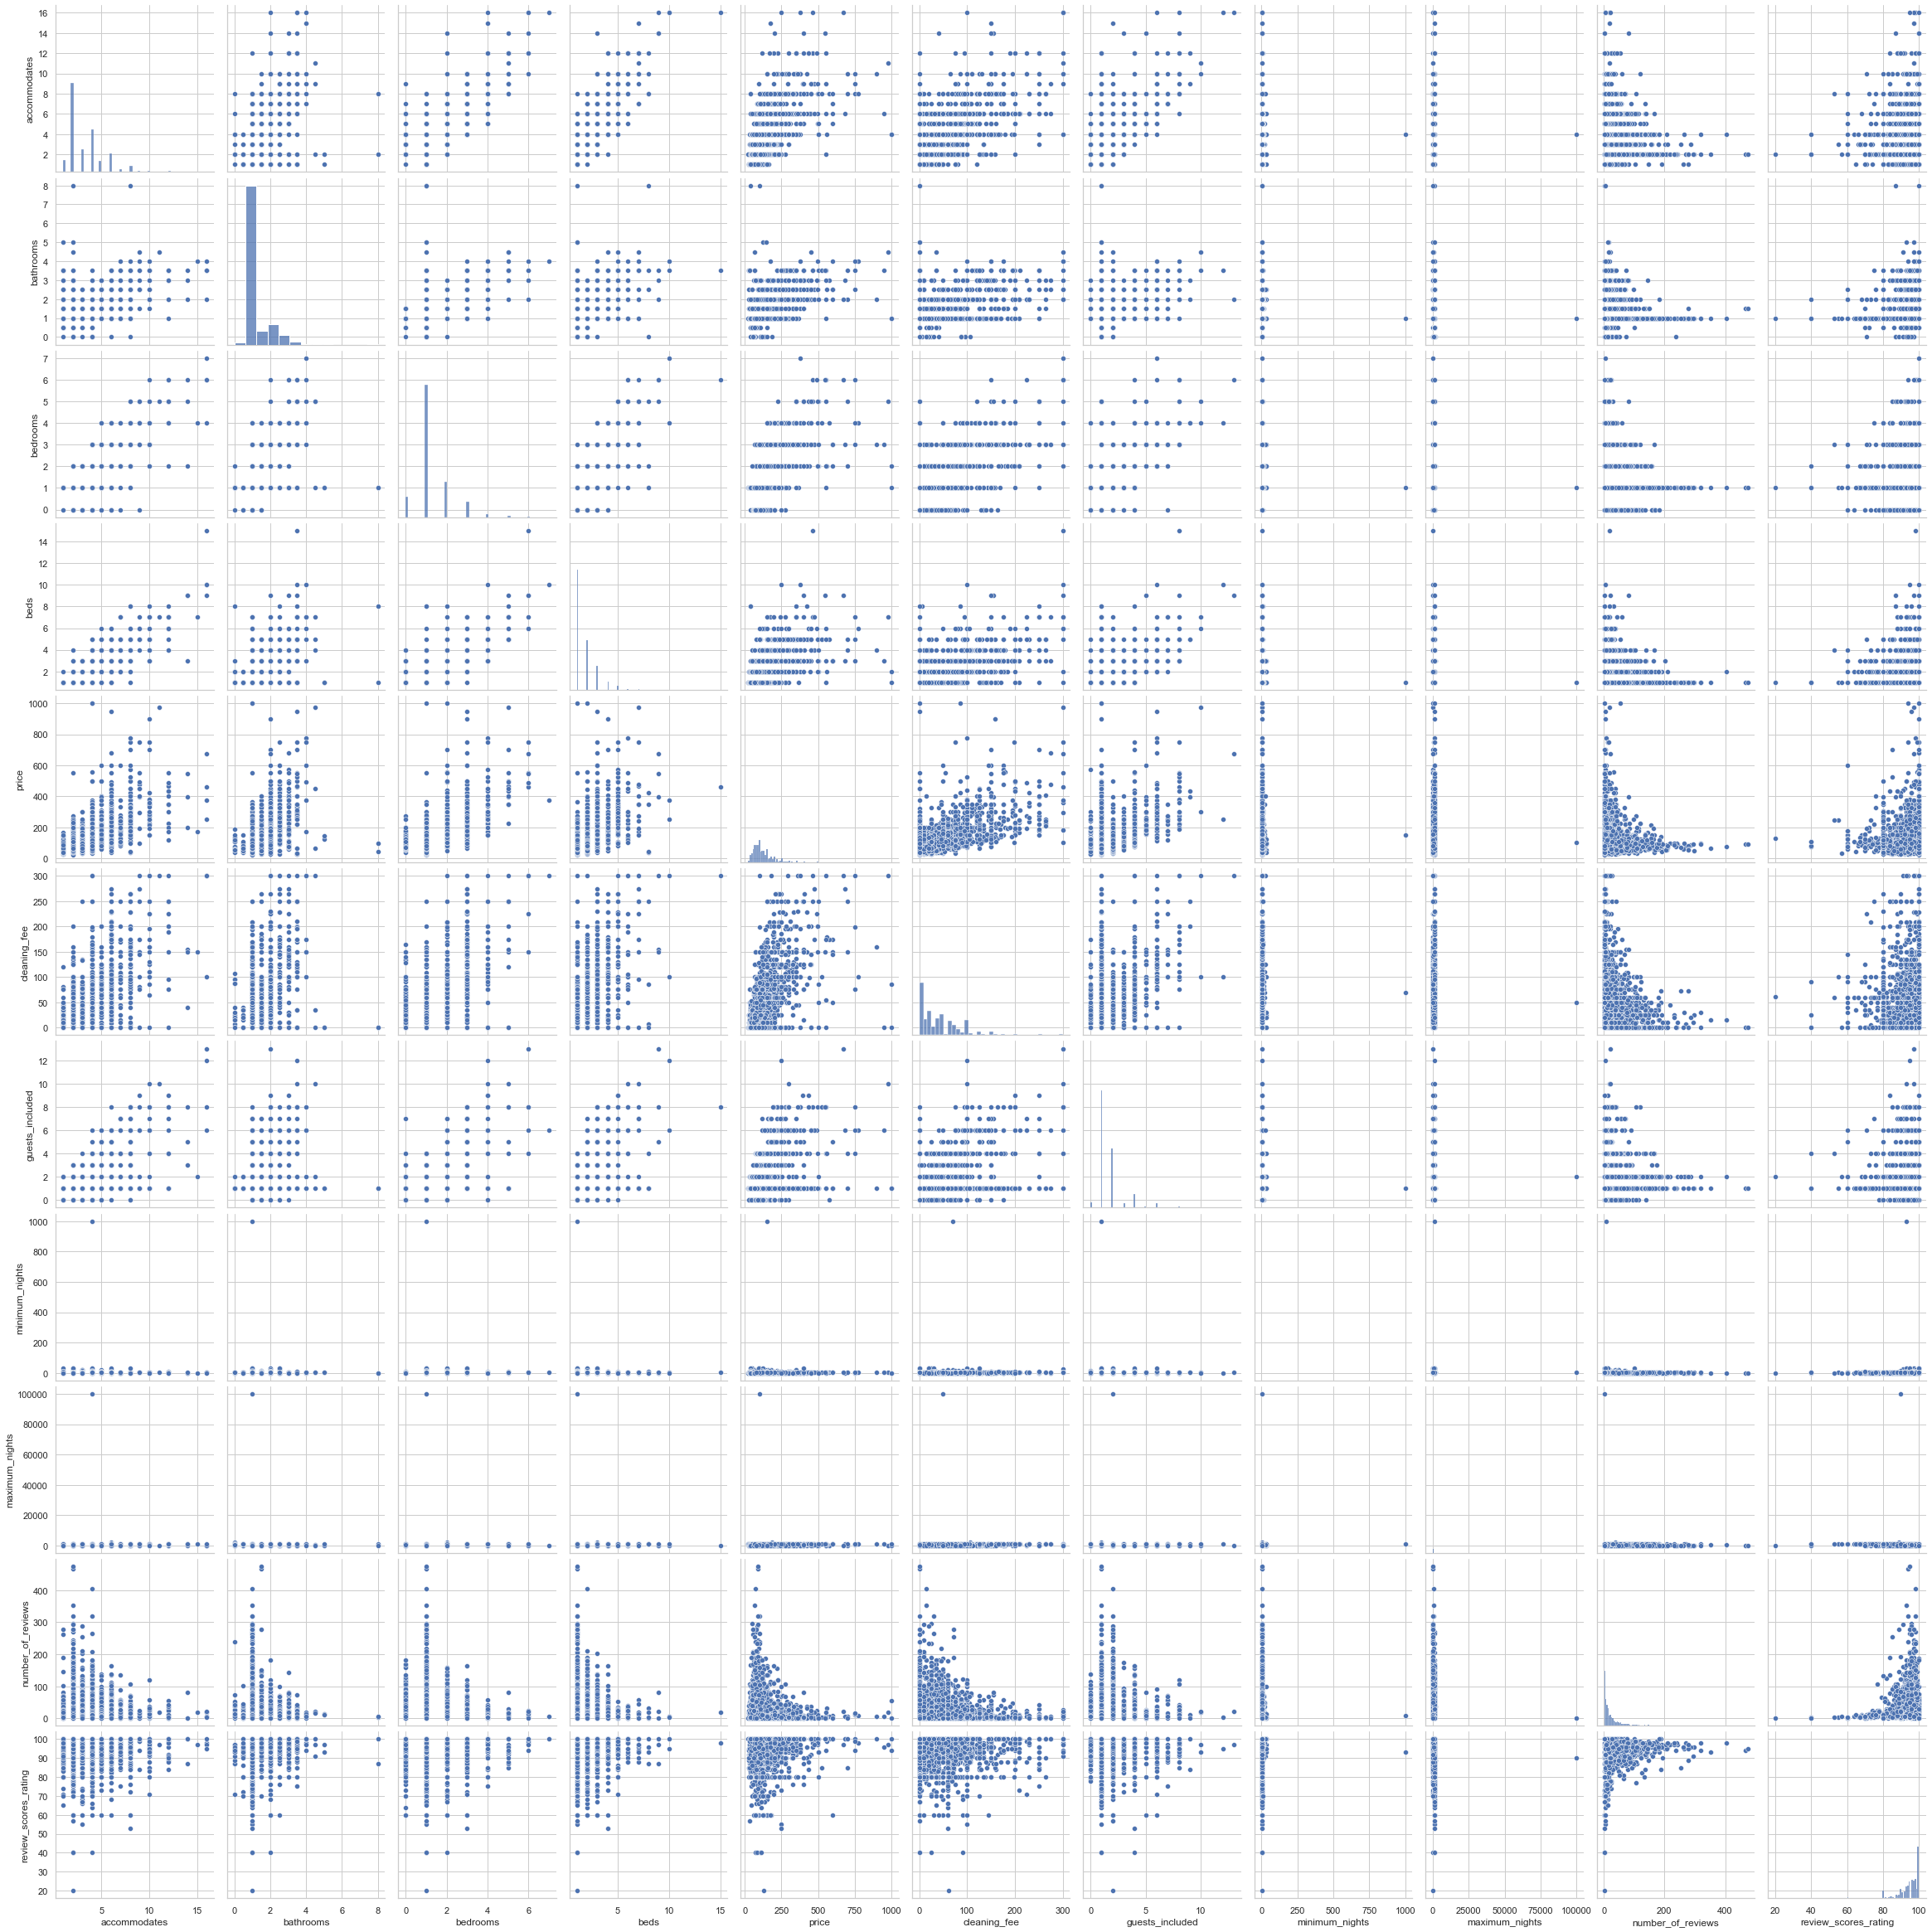

In [156]:
sns.set(style = 'whitegrid',context = 'notebook')
sns.pairplot(listing[col_corr],height=3)
plt.show()

Now we want to handle the categorical features. For the amenities column, we need to extract the information from a list.

In [157]:
import re
amenities=pd.DataFrame()
amenities=listing.copy()
amenities=amenities.set_index('id')
amenities['amenities'] = amenities['amenities'].apply(lambda x: re.sub('[{}]', '', x))
amenities['amenities'] = amenities['amenities'].apply(lambda x: re.sub('"', '', x))
amenities.head()

,host_id,neighbourhood_cleansed,neighbourhood_group_cleansed,city,latitude,longitude,property_type,room_type,accommodates,bathrooms,...,amenities,price,cleaning_fee,guests_included,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating,cancellation_policy,reviews_per_month
id,,,,,,,,,,,,,,,,,,,,,
241032,956883,West Queen Anne,Queen Anne,Seattle,47.636289,-122.371025,Apartment,Entire home/apt,4,1.0,...,"TV,Cable TV,Internet,Wireless Internet,Air Con...",85.0,0.0,2,1,365,207,95.0,moderate,4.07
953595,5177328,West Queen Anne,Queen Anne,Seattle,47.639123,-122.365666,Apartment,Entire home/apt,4,1.0,...,"TV,Internet,Wireless Internet,Kitchen,Free Par...",150.0,40.0,1,2,90,43,96.0,strict,1.48
3308979,16708587,West Queen Anne,Queen Anne,Seattle,47.629724,-122.369483,House,Entire home/apt,11,4.5,...,"TV,Cable TV,Internet,Wireless Internet,Air Con...",975.0,300.0,10,4,30,20,97.0,strict,1.15
278830,1452570,West Queen Anne,Queen Anne,Seattle,47.632918,-122.372471,House,Entire home/apt,6,2.0,...,"TV,Cable TV,Internet,Wireless Internet,Kitchen...",450.0,125.0,6,1,1125,38,92.0,strict,0.89
5956968,326758,West Queen Anne,Queen Anne,Seattle,47.630525,-122.366174,House,Private room,2,1.0,...,"Wireless Internet,Free Parking on Premises,Hea...",120.0,40.0,1,1,6,17,95.0,strict,2.45


In [158]:
dumm_variables_df = amenities['amenities'].str.get_dummies(sep=',')
dumm_variables_df

,24-Hour Check-in,Air Conditioning,Breakfast,Buzzer/Wireless Intercom,Cable TV,Carbon Monoxide Detector,Cat(s),Dog(s),Doorman,Dryer,...,Safety Card,Shampoo,Smoke Detector,Smoking Allowed,Suitable for Events,TV,Washer,Washer / Dryer,Wheelchair Accessible,Wireless Internet
id,,,,,,,,,,,,,,,,,,,,,
241032,0,1,0,0,1,0,0,0,0,1,...,0,0,0,0,0,1,1,0,0,1
953595,0,0,0,1,0,1,0,0,0,1,...,1,0,1,0,0,1,1,0,0,1
3308979,0,1,0,0,1,1,1,1,0,1,...,0,1,1,0,0,1,1,0,0,1
278830,0,0,0,0,1,1,0,0,0,0,...,0,1,1,0,0,1,0,0,0,1
5956968,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262764,1,0,0,0,1,1,1,0,0,1,...,1,1,1,0,0,1,1,0,0,1
8578490,0,1,0,0,1,0,0,0,0,1,...,1,1,1,0,0,1,1,0,0,1
3383329,1,0,0,0,0,1,0,0,0,1,...,0,1,1,0,0,0,1,0,0,1


In [159]:
amenities=pd.concat([amenities.drop("amenities",axis=1),dumm_variables_df],axis=1)
amenities.head()

,host_id,neighbourhood_cleansed,neighbourhood_group_cleansed,city,latitude,longitude,property_type,room_type,accommodates,bathrooms,...,Safety Card,Shampoo,Smoke Detector,Smoking Allowed,Suitable for Events,TV,Washer,Washer / Dryer,Wheelchair Accessible,Wireless Internet
id,,,,,,,,,,,,,,,,,,,,,
241032,956883,West Queen Anne,Queen Anne,Seattle,47.636289,-122.371025,Apartment,Entire home/apt,4,1.0,...,0,0,0,0,0,1,1,0,0,1
953595,5177328,West Queen Anne,Queen Anne,Seattle,47.639123,-122.365666,Apartment,Entire home/apt,4,1.0,...,1,0,1,0,0,1,1,0,0,1
3308979,16708587,West Queen Anne,Queen Anne,Seattle,47.629724,-122.369483,House,Entire home/apt,11,4.5,...,0,1,1,0,0,1,1,0,0,1
278830,1452570,West Queen Anne,Queen Anne,Seattle,47.632918,-122.372471,House,Entire home/apt,6,2.0,...,0,1,1,0,0,1,0,0,0,1
5956968,326758,West Queen Anne,Queen Anne,Seattle,47.630525,-122.366174,House,Private room,2,1.0,...,0,1,1,0,0,0,0,0,0,1


In [160]:
amenities_sum_df=dumm_variables_df.sum().sort_values(ascending=False).reset_index()
amenities_sum_df.head()

,index,0
0,Wireless Internet,3080
1,Heating,3047
2,Kitchen,2861
3,Smoke Detector,2766
4,Essentials,2726


Let's check the distribution of the amenities:

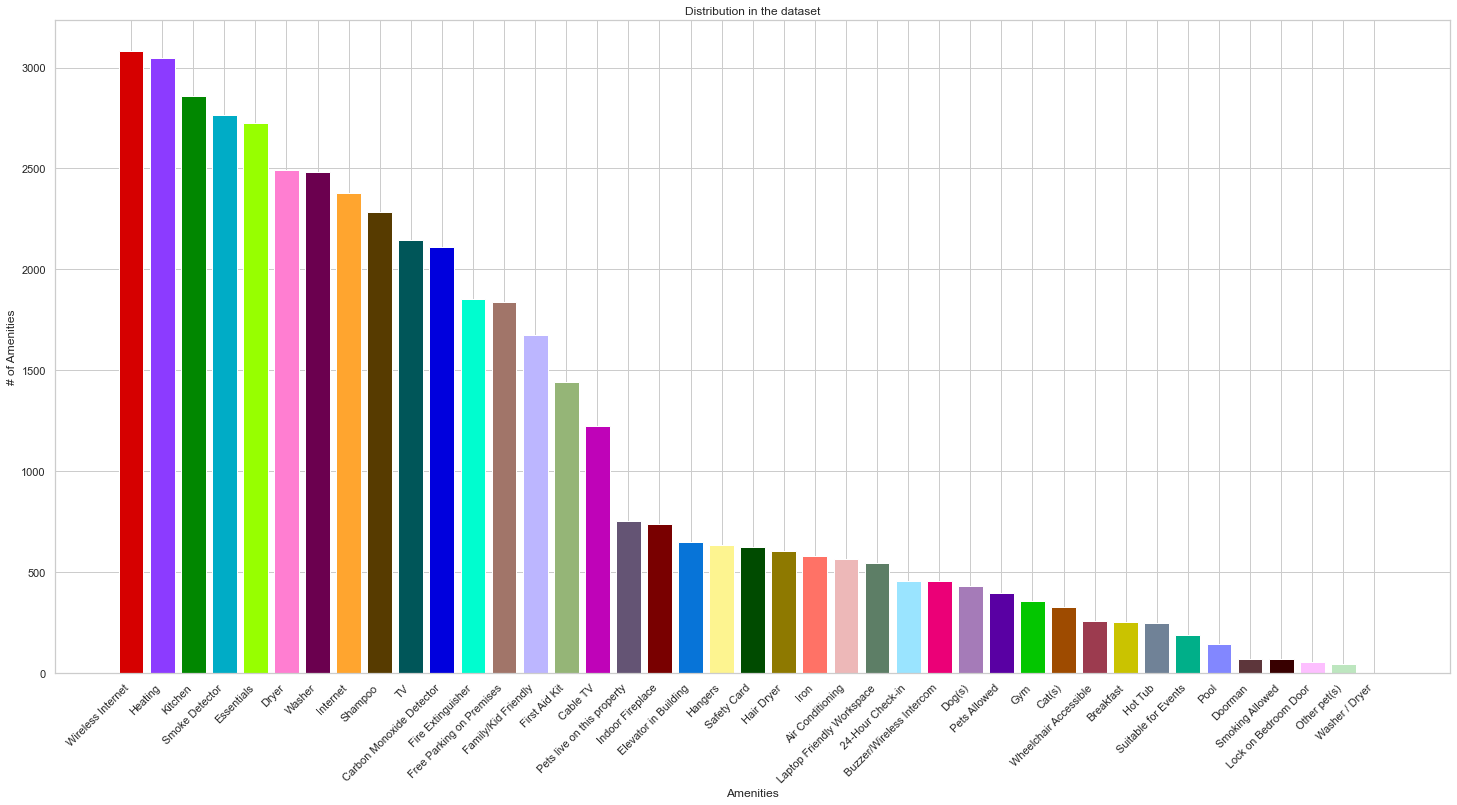

In [161]:
fig, ax = plt.subplots(figsize=(25,12))
rgb_values = sns.color_palette(cc.glasbey, len(amenities_sum_df))
ax.bar(amenities_sum_df['index'], amenities_sum_df[0], color=rgb_values)
ax.set_xlabel('Amenities')
ax.set_ylabel('# of Amenities')
ax.set_title('Distribution in the dataset')
plt.xticks(rotation=45,ha='right')
plt.show()

In [162]:
amenities.head()
amenities.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3171 entries, 241032 to 8902327
Data columns (total 63 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   host_id                       3171 non-null   int64  
 1   neighbourhood_cleansed        3171 non-null   object 
 2   neighbourhood_group_cleansed  3171 non-null   object 
 3   city                          3171 non-null   object 
 4   latitude                      3171 non-null   float64
 5   longitude                     3171 non-null   float64
 6   property_type                 3171 non-null   object 
 7   room_type                     3171 non-null   object 
 8   accommodates                  3171 non-null   int64  
 9   bathrooms                     3171 non-null   float64
 10  bedrooms                      3171 non-null   float64
 11  beds                          3171 non-null   float64
 12  bed_type                      3171 non-null   object 


In [163]:
columns_to_drop=['host_id','neighbourhood_cleansed','city','latitude','longitude']
amenities.drop(columns_to_drop,axis=1, inplace=True)

In [164]:
cat_vars = amenities.select_dtypes(include=['object']).copy().columns
print(cat_vars)
for var in  cat_vars:
    # for each cat add dummy var, drop original column
    amenities = pd.concat([amenities.drop(var, axis=1), pd.get_dummies(amenities[var], prefix=var, prefix_sep='_', drop_first=True)], axis=1)

Index(['neighbourhood_group_cleansed', 'property_type', 'room_type',
       'bed_type', 'cancellation_policy'],
      dtype='object')


In [165]:
amenities.head()

,accommodates,bathrooms,bedrooms,beds,price,cleaning_fee,guests_included,minimum_nights,maximum_nights,number_of_reviews,...,property_type_Treehouse,property_type_Yurt,room_type_Private room,room_type_Shared room,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,cancellation_policy_moderate,cancellation_policy_strict
id,,,,,,,,,,,,,,,,,,,,,
241032,4,1.0,1.0,1.0,85.0,0.0,2,1,365,207,...,0,0,0,0,0,0,0,1,1,0
953595,4,1.0,1.0,1.0,150.0,40.0,1,2,90,43,...,0,0,0,0,0,0,0,1,0,1
3308979,11,4.5,5.0,7.0,975.0,300.0,10,4,30,20,...,0,0,0,0,0,0,0,1,0,1
278830,6,2.0,3.0,3.0,450.0,125.0,6,1,1125,38,...,0,0,0,0,0,0,0,1,0,1
5956968,2,1.0,1.0,1.0,120.0,40.0,1,1,6,17,...,0,0,1,0,0,0,0,1,0,1


In [179]:
def train_linear_model(df,col_corr):
    X_train, X_test, y_train, y_test = train_test_split(df[col_corr], df['price'], test_size = 0.25, random_state=0)
    from sklearn.pipeline import Pipeline
    from sklearn.preprocessing import StandardScaler
    model =  Pipeline([('scl',StandardScaler(with_mean=False)),('model', linear_model.LinearRegression())])
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    r2_test = r2_score(y_test,y_test_pred)
    print("R2 error: {}".format(r2_test))
    # plot residuals
    plt.scatter(y_train_pred,  y_train_pred - y_train,
                c='blue', marker='o', label='Training data')
    plt.scatter(y_test_pred,  y_test_pred - y_test,
                c='lightgreen', marker='s', label='Test data')
    plt.xlabel('Predicted values')
    plt.ylabel('Residuals')
    plt.legend(loc='upper left')
    plt.show()
    return model

R2 error: 0.5532003582468593


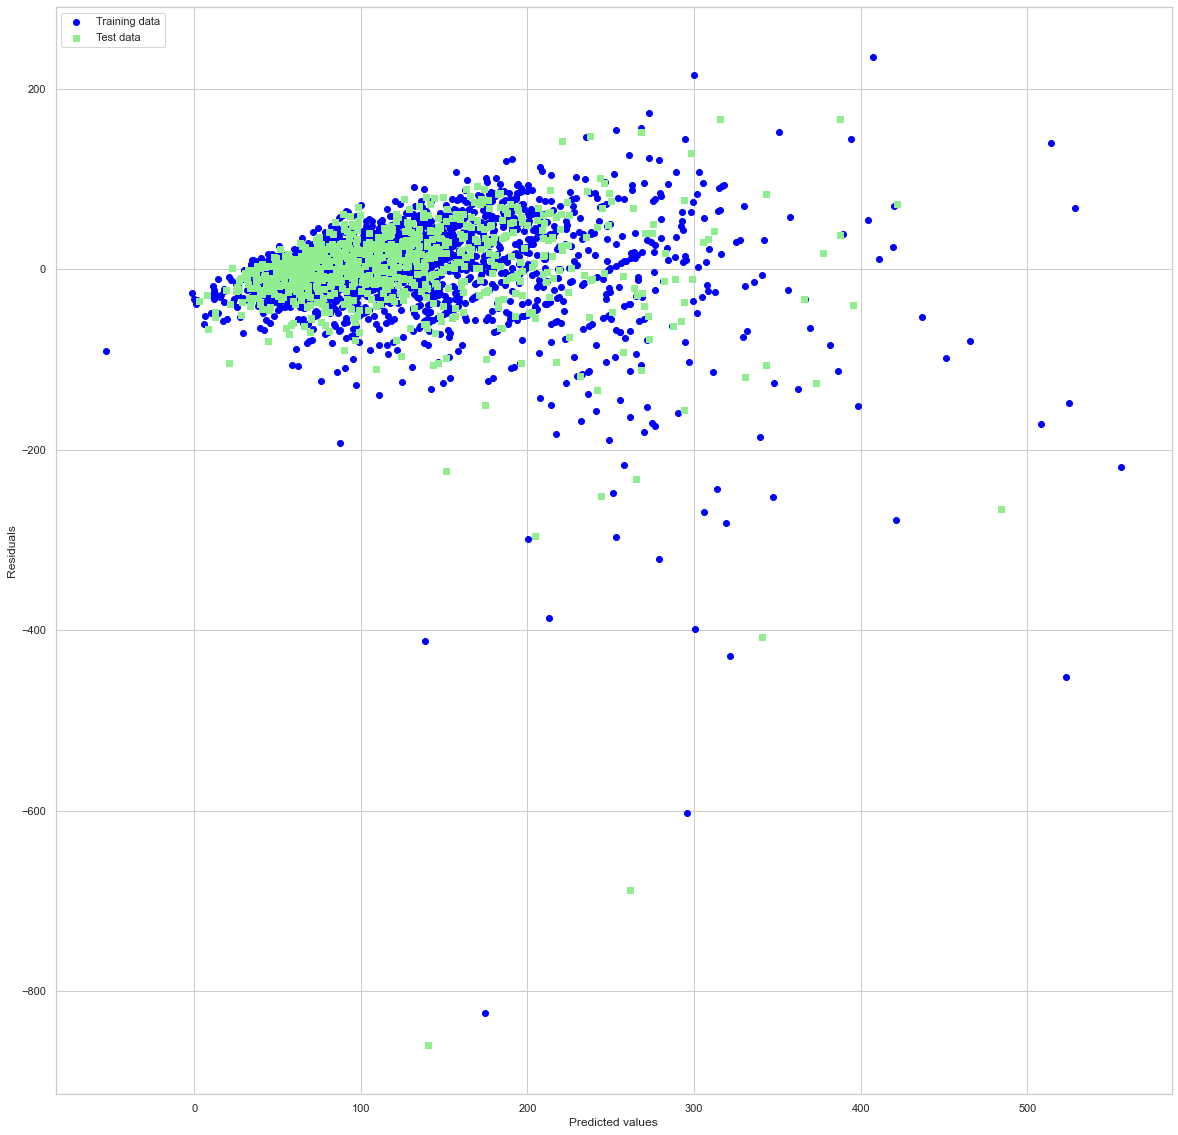

,features,coefs,abs_coefs
2,bedrooms,22.008488,22.008488
0,accommodates,14.816201,14.816201
4,cleaning_fee,14.073616,14.073616
1,bathrooms,13.771901,13.771901
101,room_type_Private room,-13.572709,13.572709
...,...,...,...
69,neighbourhood_group_cleansed_Laurelhurst,0.123909,0.123909
97,property_type_Tent,-0.111679,0.111679
90,property_type_Camper/RV,-0.091036,0.091036
64,neighbourhood_group_cleansed_Green Lake,-0.037208,0.037208


In [180]:
col_features=list(amenities)
col_features.remove("price")
model= train_linear_model(amenities,col_features)
coeff_dataset=pd.DataFrame()
coeff_dataset['features']=col_features
coeff_dataset['coefs']=model['model'].coef_
coeff_dataset['abs_coefs']=np.abs(model['model'].coef_)
coeff_dataset=coeff_dataset.sort_values('abs_coefs',ascending=False)
coeff_dataset

Extract the information from the amenities list to check if some of them are important factors to determine the price

In [168]:
def plot_distribution(dataset,columns):
    import math
    columns_graph = 3
    fig, axes = plt.subplots(math.ceil(len(columns)/columns_graph), columns_graph,figsize=(30, 12), sharey=False)
    fig.suptitle('Data distribution in the dataset')
    t=-1
    for i,c in enumerate(columns):
        if i%columns_graph == 0:
            t+=1
        sns.histplot(ax=axes[t, i%columns_graph], data=dataset[c])

    plt.show()

## QUESTION 3


In [169]:
calendar['date'] = pd.to_datetime(calendar['date'])
calendar['month'] = calendar['date'].dt.month
calendar['price'] = calendar['price'].replace({'\$':''}, regex = True)
calendar['price'] = calendar['price'].apply(lambda x: float(str(x).replace(',','')))
calendar.head()

,listing_id,date,available,price,month
0,241032,2016-01-04,1,85.0,1
1,241032,2016-01-05,1,85.0,1
2,241032,2016-01-06,0,NaN,1
3,241032,2016-01-07,0,NaN,1
4,241032,2016-01-08,0,NaN,1


In [170]:
df_av_prices = calendar[['listing_id','month','price']].groupby(['listing_id','month']).mean()
df_av_prices = df_av_prices.rename(columns={"price": "mean_price"})
df_av_prices.head()

mean_price
listing_id month            
3335       1           120.0
           2           120.0
           3           120.0
           4           120.0
           5           120.0

In [171]:
df_availability = calendar[['listing_id','month','available']].groupby(['listing_id','month']).sum()
df_availability = df_availability.rename(columns={"available": "total_availability"})
df_availability.head()

total_availability
listing_id month                    
3335       1                       2
           2                       1
           3                      31
           4                      30
           5                      31

In [172]:
info_average_price_availability=pd.merge(df_availability, df_av_prices, how='inner', left_index=True,right_index=True).reset_index()
info_average_price_availability.head()

,listing_id,month,total_availability,mean_price
0,3335,1,2,120.0
1,3335,2,1,120.0
2,3335,3,31,120.0
3,3335,4,30,120.0
4,3335,5,31,120.0


In [173]:
info_average_price_availability= pd.merge(listing[['neighbourhood_group_cleansed',"id"]], info_average_price_availability, how='inner', left_on="id",right_on="listing_id")
info_average_price_availability = info_average_price_availability[['neighbourhood_group_cleansed','month','total_availability','mean_price']]
info_average_price_availability.head()

,neighbourhood_group_cleansed,month,total_availability,mean_price
0,Queen Anne,1,14,85.0
1,Queen Anne,2,26,85.0
2,Queen Anne,3,31,85.0
3,Queen Anne,4,30,85.0
4,Queen Anne,5,31,85.0


In [174]:
info_average_price_availability= pd.merge(info_average_price_availability.groupby(['neighbourhood_group_cleansed','month']).sum()["total_availability"],info_average_price_availability.groupby(['neighbourhood_group_cleansed','month']).mean()["mean_price"],how='inner', left_index=True,right_index=True).reset_index()
info_average_price_availability.head()

,neighbourhood_group_cleansed,month,total_availability,mean_price
0,Ballard,1,3202,114.496402
1,Ballard,2,3542,110.588800
2,Ballard,3,4225,114.919646
3,Ballard,4,4003,121.494725
4,Ballard,5,4285,125.552779


In [175]:
def plot_barchar_fluctuation(data, neighbourhood):
    data= data[data["neighbourhood_group_cleansed"]== neighbourhood]
    fig, ax1 = plt.subplots(figsize=(25,12))
    rgb_values = sns.color_palette(cc.glasbey, 10)
    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

    ax1.set_xlabel('month')
    ax1.set_ylabel('total availability', color=rgb_values[0])
    ax1.bar(data['month']+0.2,data['total_availability'],width=0.4, color=rgb_values[0])
    ax1.tick_params(axis='y', labelcolor=rgb_values[0])


    ax2.set_ylabel('average price', color=rgb_values[8])  # we already handled the x-label with ax1
    ax2.bar(data['month']-0.2,data['mean_price'], width=0.4,color=rgb_values[8])
    ax2.tick_params(axis='y', labelcolor=rgb_values[8])
    plt.xticks(data['month'].unique())
    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    plt.show()

In [176]:
sol=info_average_price_availability.groupby(["neighbourhood_group_cleansed"])[["total_availability","mean_price"]].std()
sol["mean_price"].nlargest(3)

neighbourhood_group_cleansed
Windermere    32.689052
Downtown      28.902086
South Park    28.749692
Name: mean_price, dtype: float64

In [177]:
sol["total_availability"].nlargest(3)

neighbourhood_group_cleansed
Downtown        766.611726
Capitol Hill    702.415292
Central Area    629.585789
Name: total_availability, dtype: float64

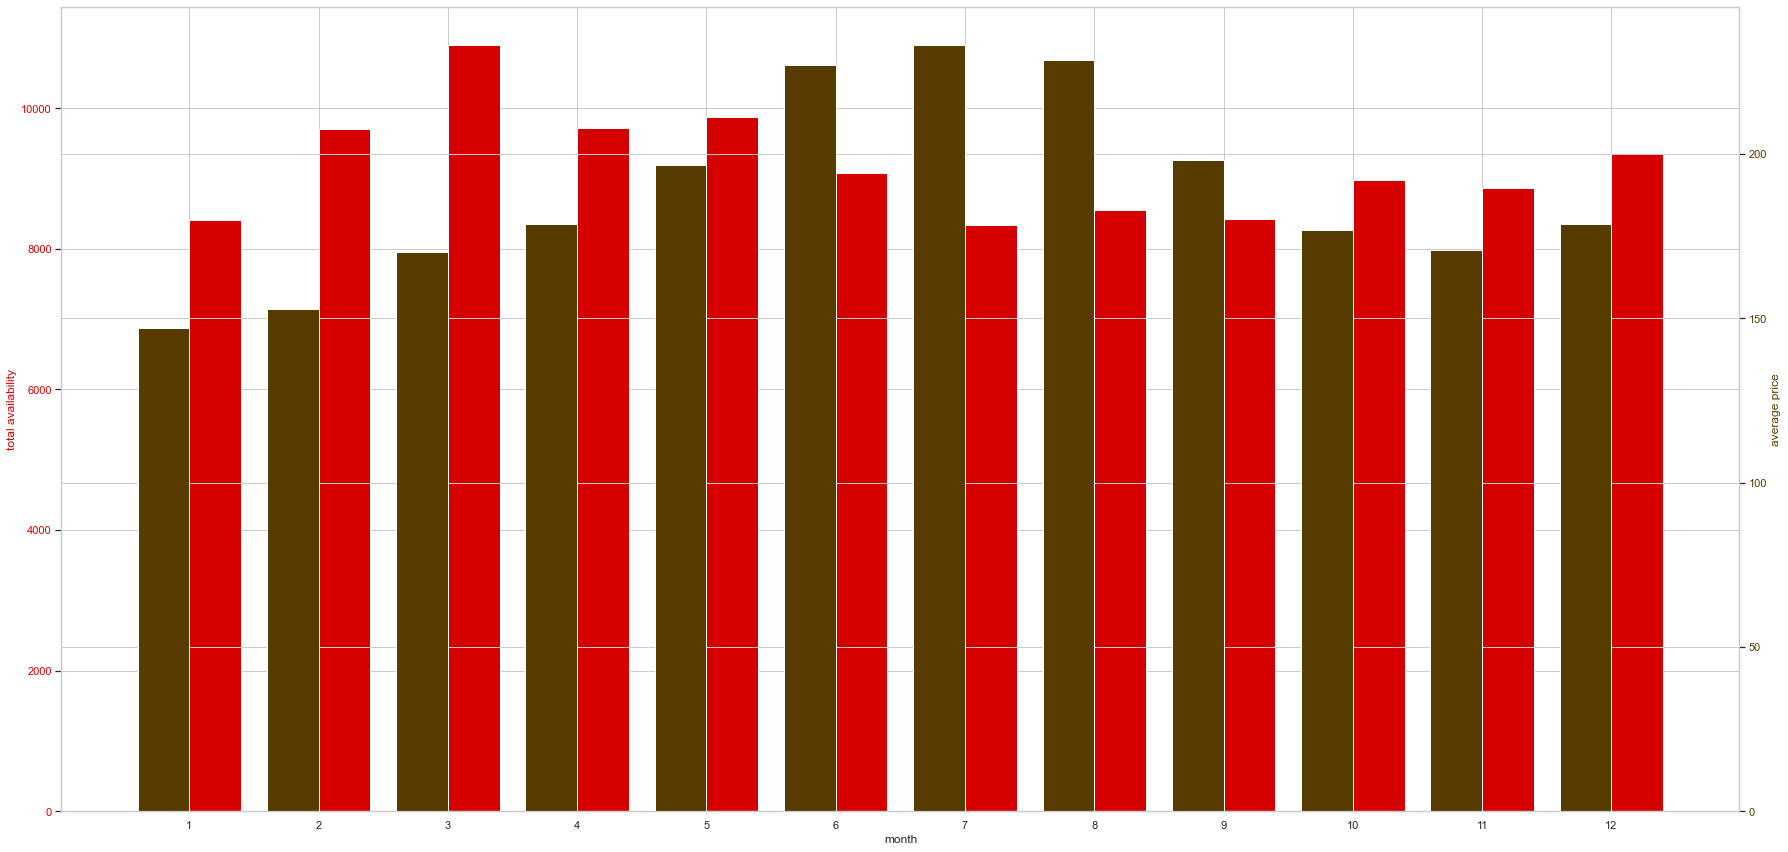

In [178]:
plot_barchar_fluctuation(info_average_price_availability, "Downtown")

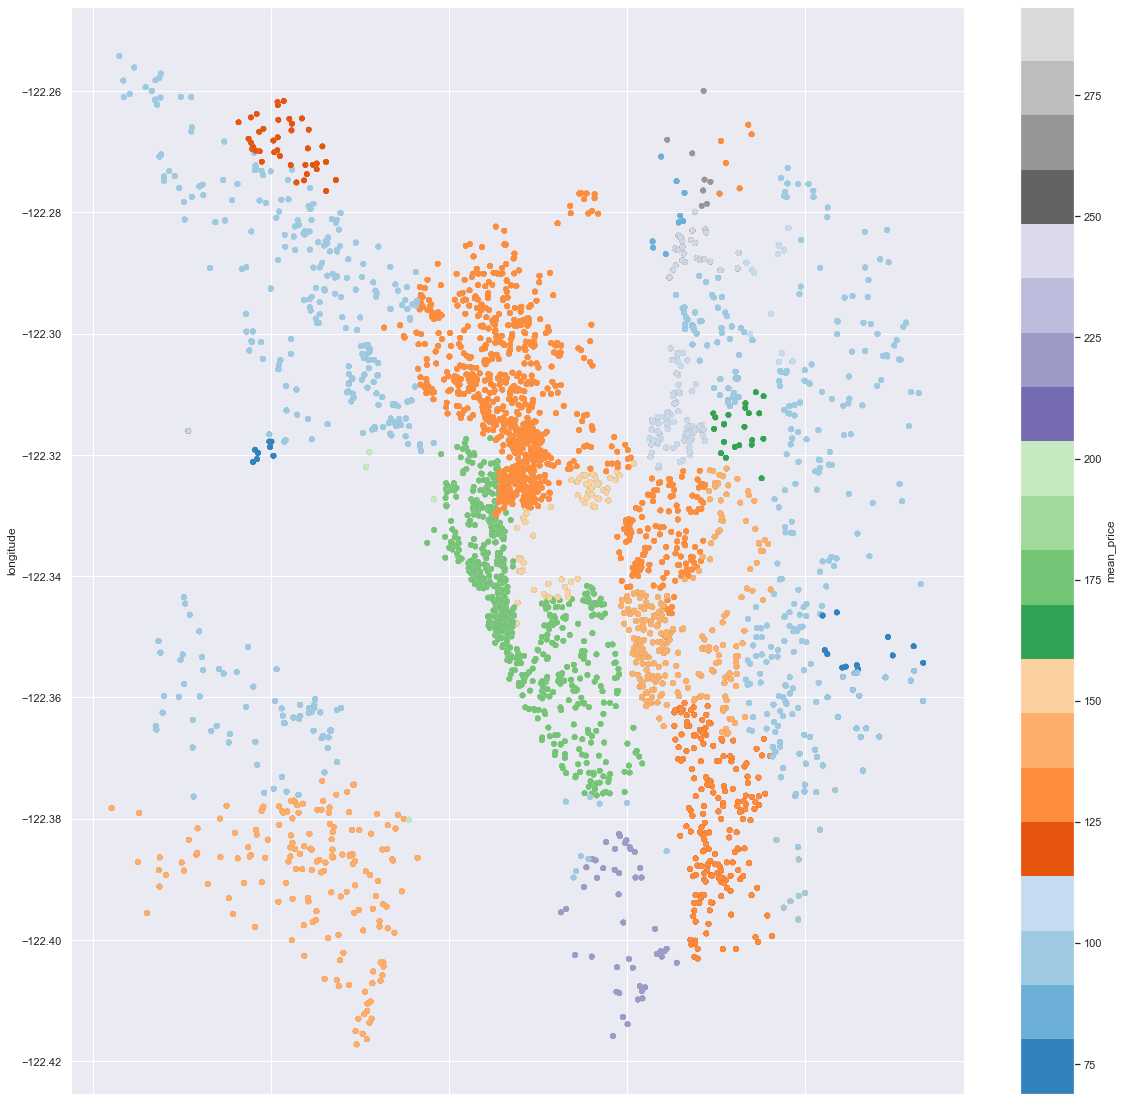

In [192]:
neighbourhood_std = pd.merge(listing,info_average_price_availability, left_on="neighbourhood_group_cleansed", right_on="neighbourhood_group_cleansed", how="inner")

C:\Users\Giacomo\AppData\Local\Temp\ipykernel_9832\1083780076.py:4: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().
  fig.colorbar(sp_1)
C:\Users\Giacomo\AppData\Local\Temp\ipykernel_9832\1083780076.py:4: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  fig.colorbar(sp_1)


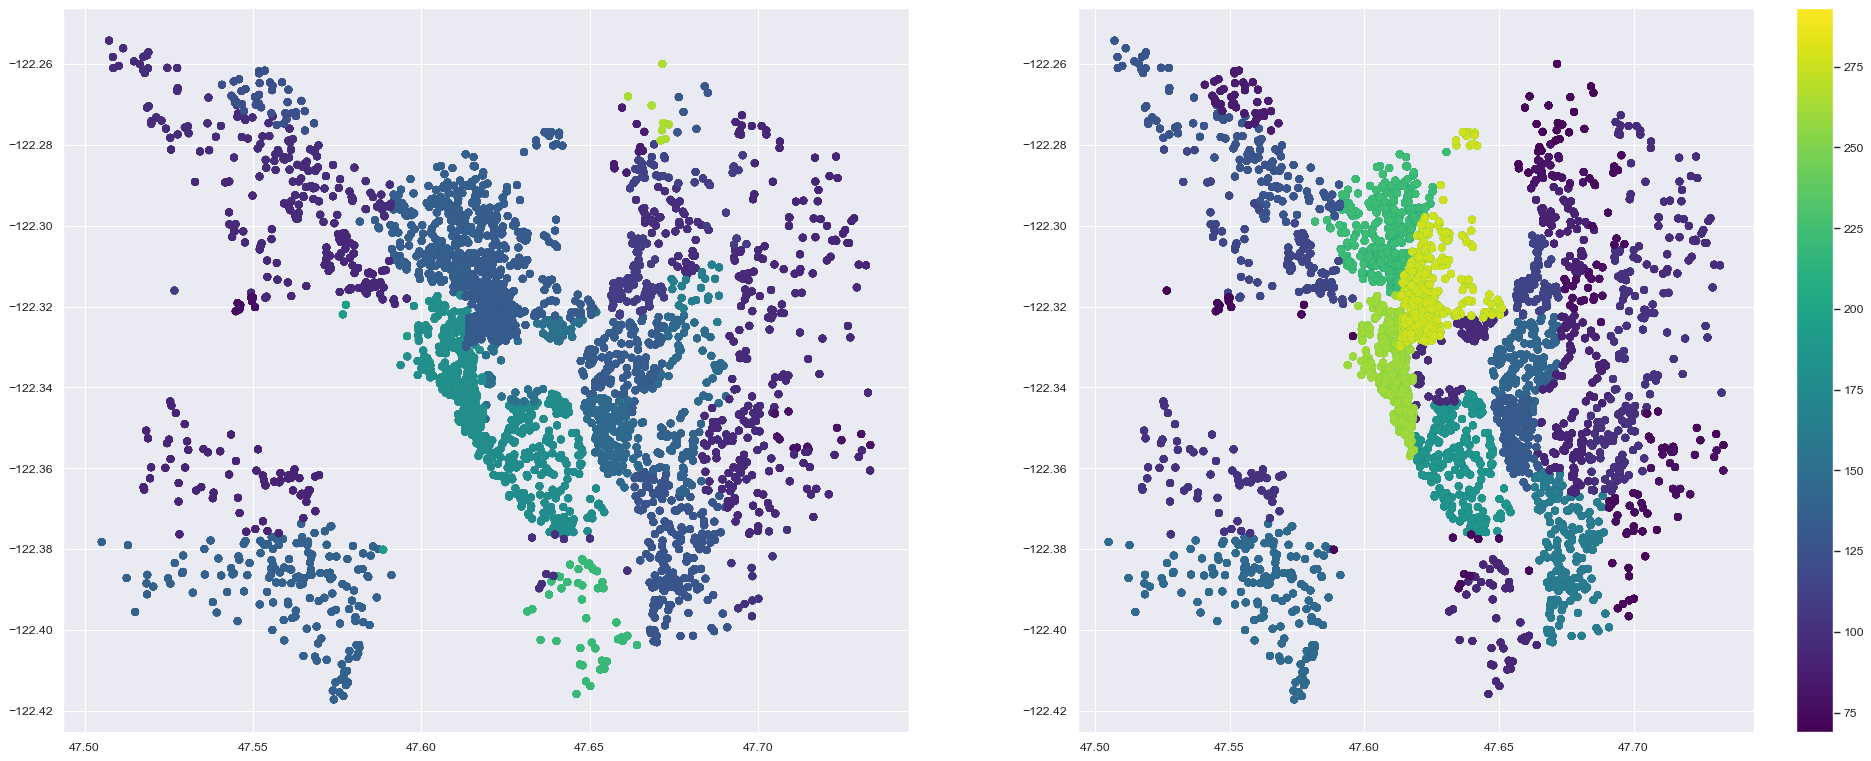

In [199]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(30, 12), dpi=80)
sp_1=axes[0].scatter(x=neighbourhood_std['latitude'],y=neighbourhood_std['longitude'],c=neighbourhood_std["mean_price"],cmap='viridis')
sp_2=axes[1].scatter(x=neighbourhood_std['latitude'],y=neighbourhood_std['longitude'],c=neighbourhood_std["total_availability"],cmap='viridis')
fig.colorbar(sp_1)
    #plt.xticks(rotation=45,ha='right')

    #fig.savefig('./seattle_map_{}.png'.format(name))